In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [70]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
df_s_smoker = df[['sex', 'smoker']]
df_s_smoker['client_id'] = range(len(df_s_smoker['sex']))
df_s_smoker

/var/folders/m2/02db1vqj4dn9n70qsljztby00000gn/T/ipykernel_71974/598269083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_smoker['client_id'] = range(len(df_s_smoker['sex']))


,sex,smoker,client_id
0,female,yes,0
1,male,no,1
2,male,no,2
3,male,no,3
4,male,no,4
...,...,...,...
1333,male,no,1333
1334,female,no,1334
1335,female,no,1335
1336,female,no,1336


In [72]:
df_s_smoker = df_s_smoker.groupby(['smoker', 'sex'], as_index=False)[['client_id']].nunique()
df_s_smoker

,smoker,sex,client_id
0,no,female,547
1,no,male,517
2,yes,female,115
3,yes,male,159


In [73]:
df_s_smoker_p = df_s_smoker.pivot(columns='sex', index='smoker', values='client_id')
df_s_smoker_p

sex,female,male
smoker,,
no,547,517
yes,115,159


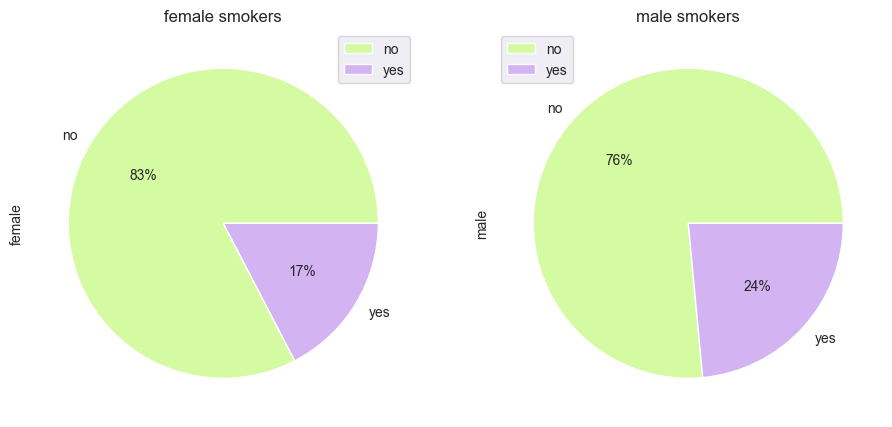

In [74]:
figue, axis = plt.subplots(1, 2, figsize=(11,6))

df_s_smoker_p.plot.pie(y='female', autopct='%1.0f%%', colors = ['#d4faa2', '#d3b3f2'], ax=axis[0])
axis[0].set_title('female smokers')
df_s_smoker_p.plot.pie(y='male', autopct='%1.0f%%', colors = ['#d4faa2', '#d3b3f2'], ax=axis[1])
axis[1].set_title('male smokers')
plt.legend(loc='upper left')

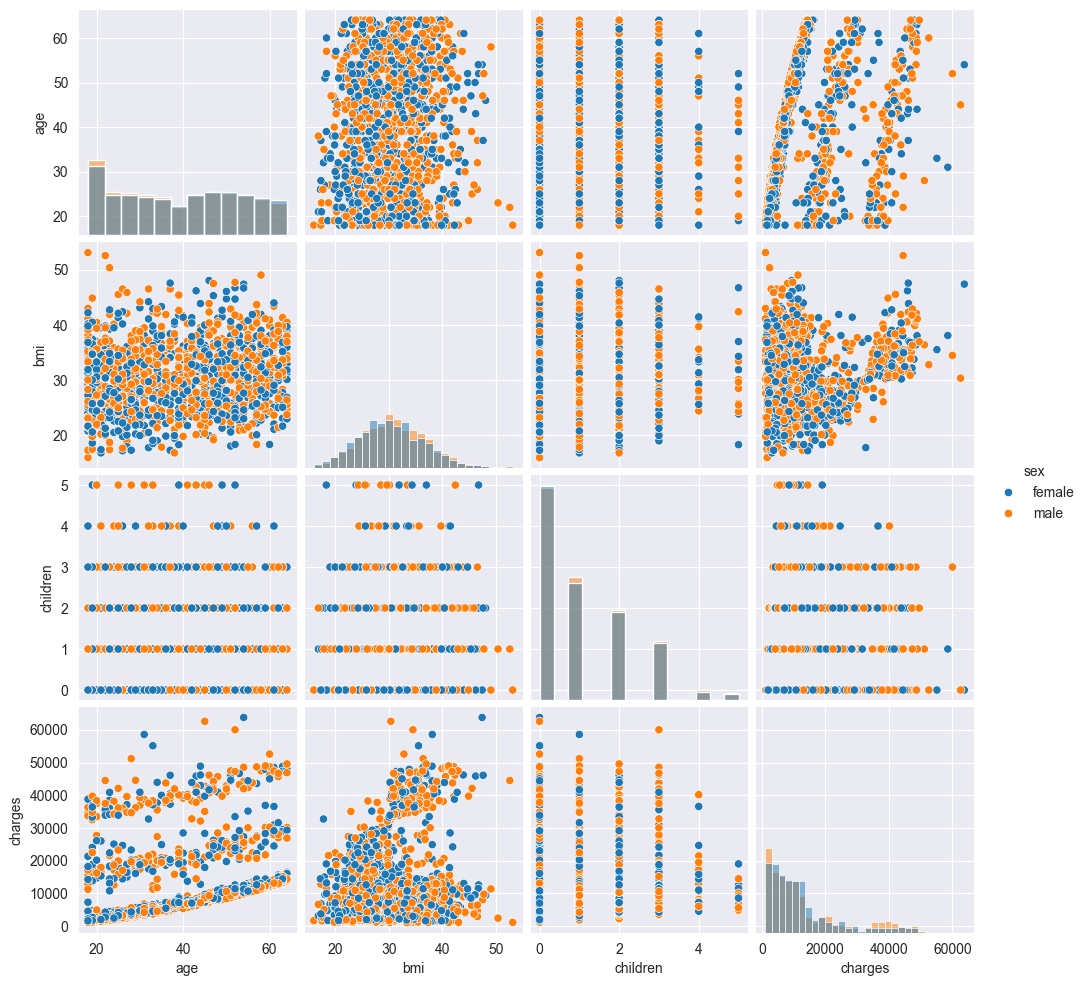

In [78]:
sns.pairplot(df, hue='sex', diag_kind='hist')

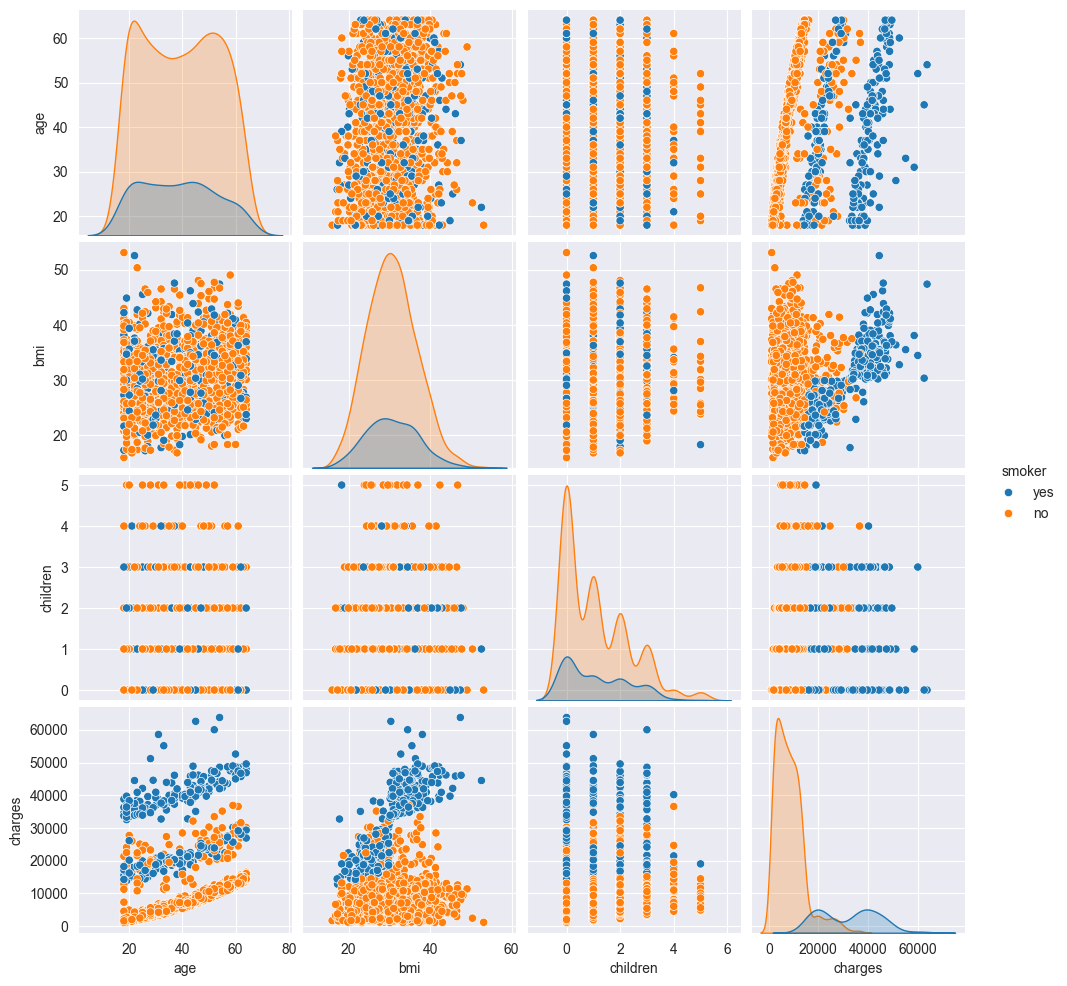

In [80]:
sns.pairplot(df, hue='smoker')

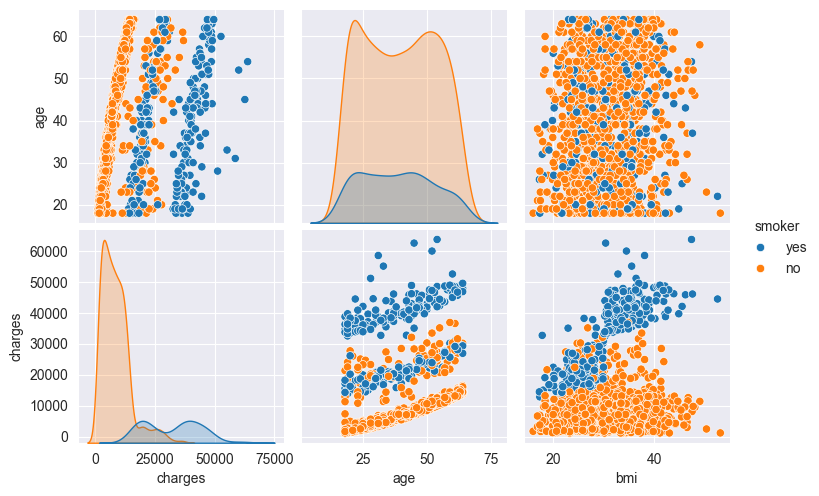

In [88]:
sns.pairplot(
    df,
    hue='smoker',
    x_vars=['charges', 'age', 'bmi'],
    y_vars=['age', 'charges']
)

Text(0.0, 1.02, 'Dependence of charges on bmi')

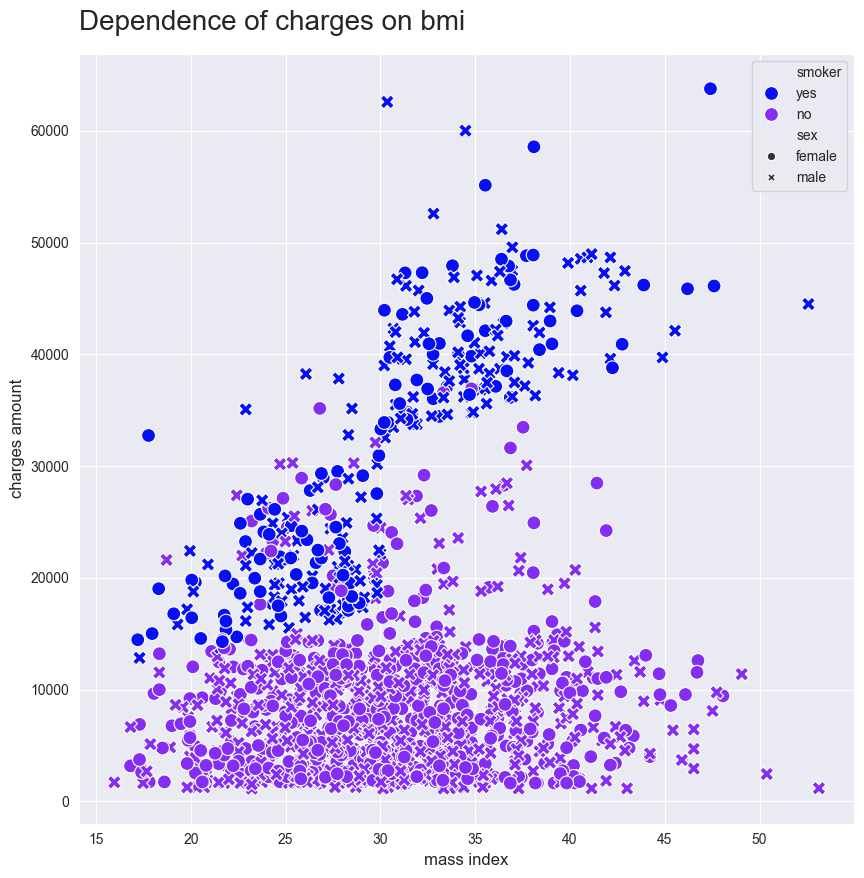

In [140]:
plt.figure(figsize=(10,10))

palette = ['#070ff5', '#832ef2']

sns.scatterplot(
    df,
    x='bmi',
    y='charges',
    hue='smoker',
    style='sex',
    size='smoker',
    sizes=(100, 100),
    palette=palette
)

plt.xlabel('mass index', fontsize=12)
plt.ylabel('charges amount', fontsize=12)
plt.title('Dependence of charges on bmi', size=20, loc='left', y=1.02)

Text(0.0, 1.02, 'Dependence of charges on bmi')

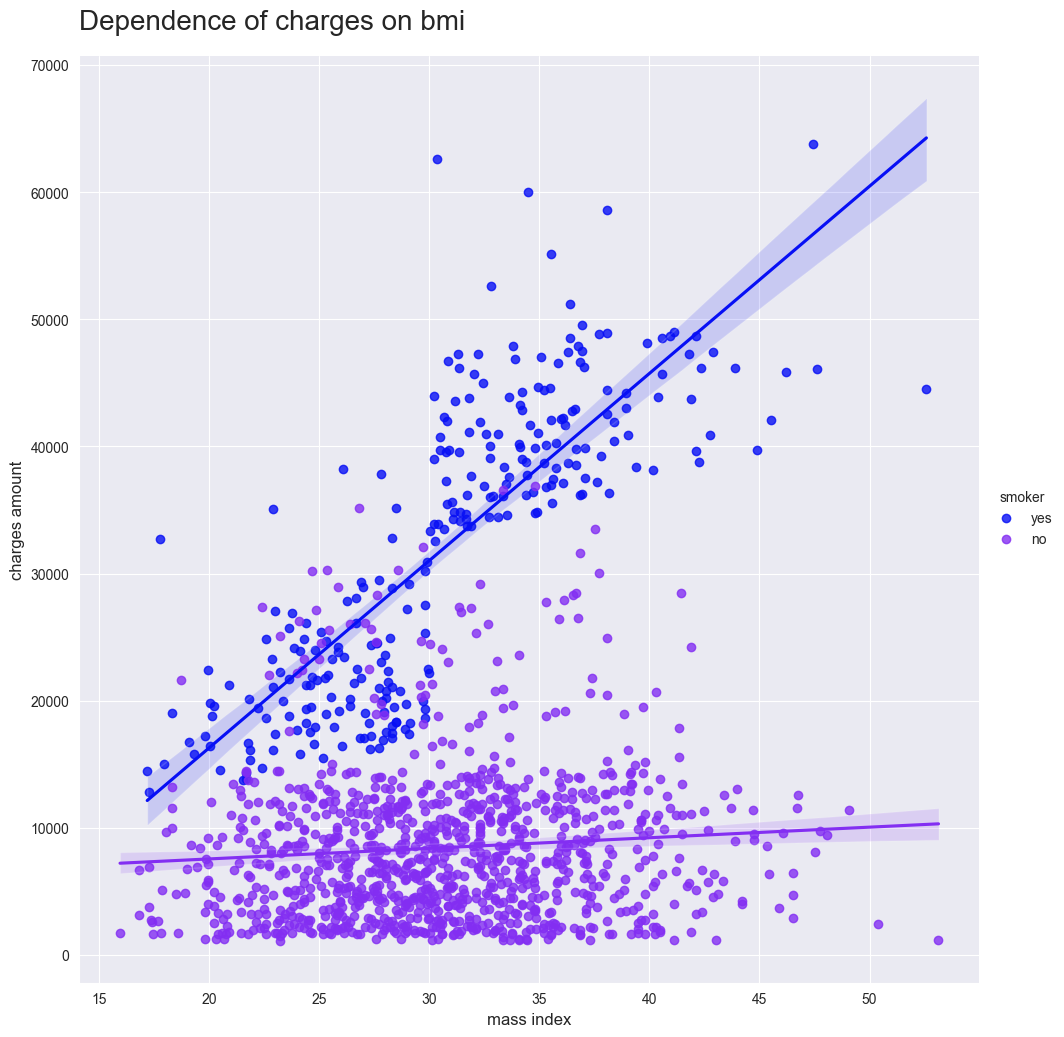

In [145]:
#plt.figure(figsize=(10,10)) this does not work with lmplot

sns.lmplot(
    df,
    x='bmi',
    y='charges',
    hue='smoker',
    palette=palette,
    height=10,
    aspect=1
)

plt.xlabel('mass index', fontsize=12)
plt.ylabel('charges amount', fontsize=12)
plt.title('Dependence of charges on bmi', size=20, loc='left', y=1.02)

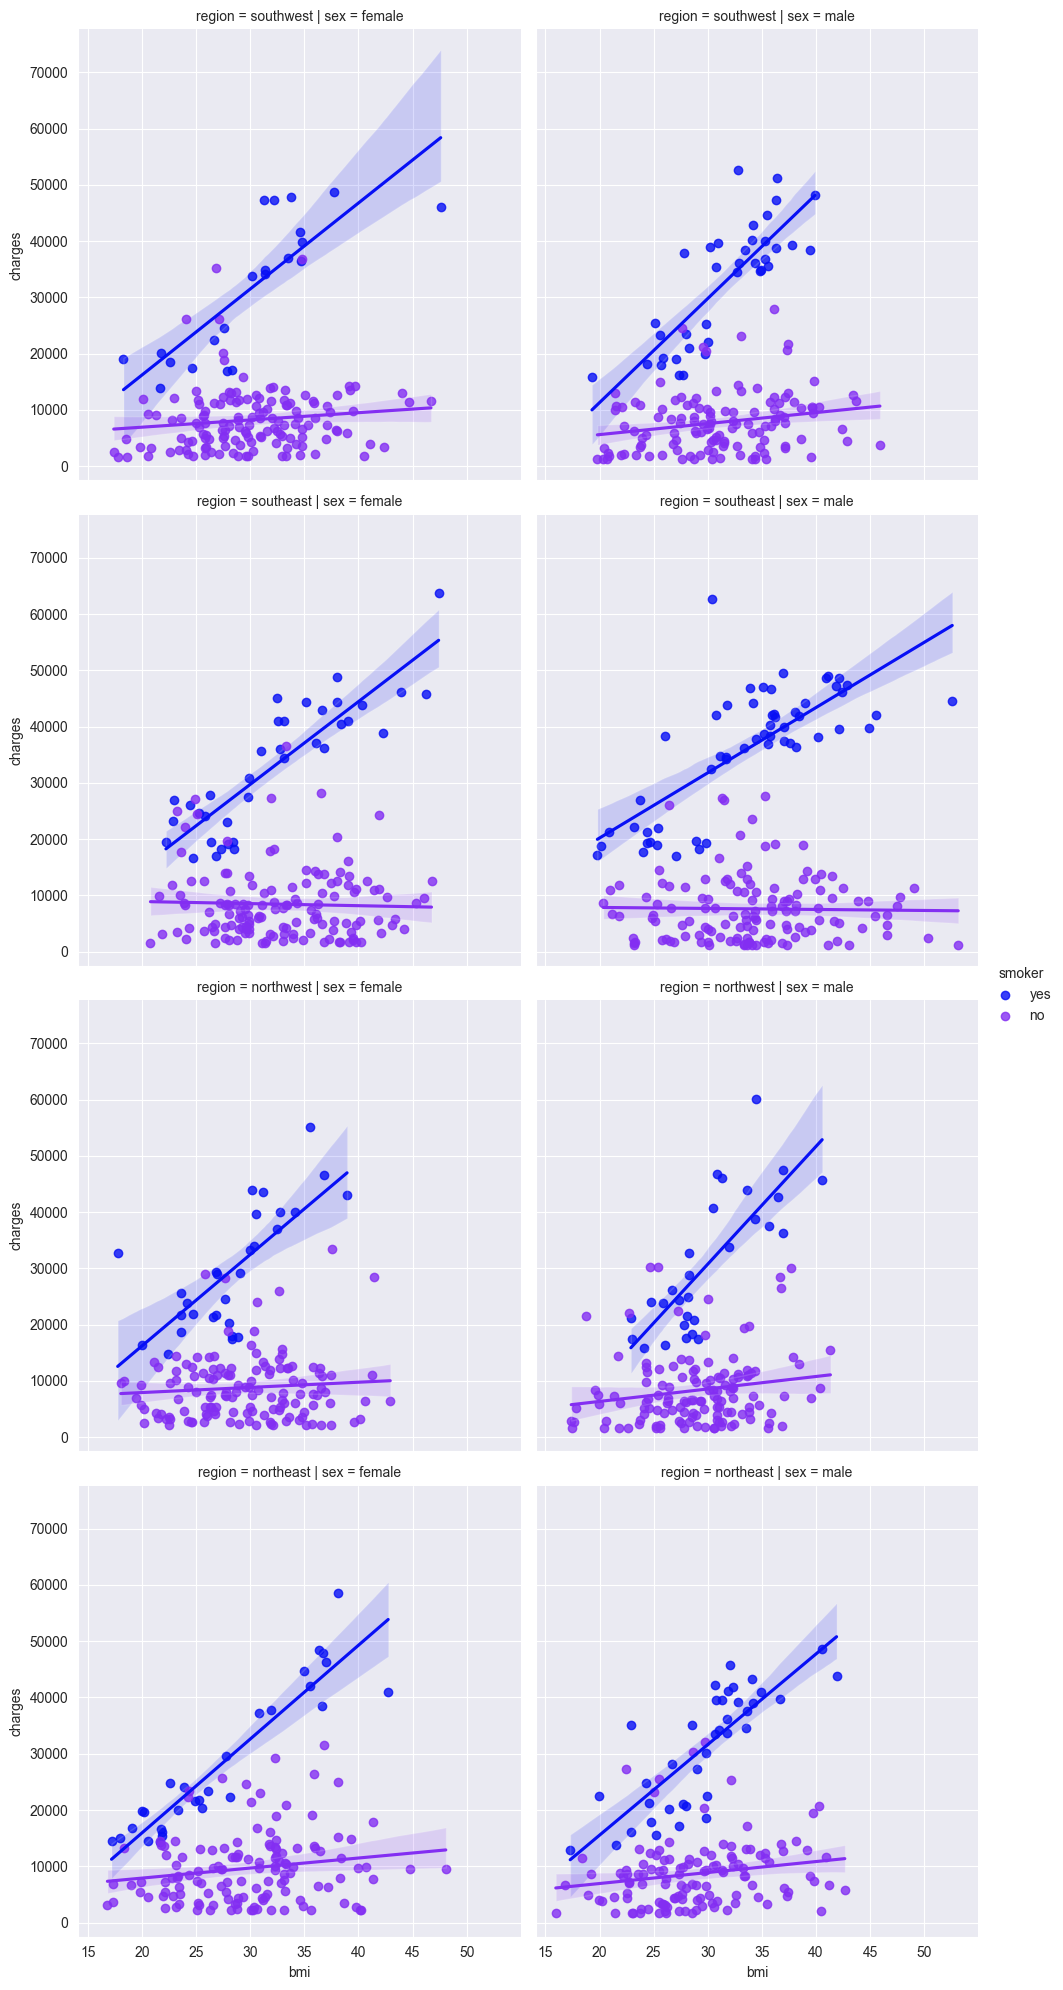

In [ ]:
sns.lmplot(
    df,
    x='bmi',
    y='charges',
    hue='smoker',
    palette=palette,
    col='sex', # separates charts in two columns by this condition
    row='region'# separates charts in rows by this condition
)